# Numpy

## Знакомство с библиотекой Numpy

Начнем с загрузки библиотеки `numpy` под общепринятым псевдонимом `np`.

In [2]:
# импортировать библиотеку
import numpy as np

## Объект array (массив)

Создаем наш первый объект класса array `a1`, который соответствует следующей матрице:

$a_1 = \left(\begin{array}{ccc}1&2&3&4&5\\5&4&3&2&1\end{array}\right)$

In [3]:
# создать и распечатать массив
a1 = np.array([[1, 2, 3, 4, 5],[5, 4, 3, 2, 1]])
a1

array([[1, 2, 3, 4, 5],
       [5, 4, 3, 2, 1]])

Воспользуемся атрибутом `dtype` (data type -- тип данных), который есть у объекта класса array, чтобы увидеть, что numpy определил тип данных элементов этого массива как `int64`, то есть, как 64-битное целочисленное значение.

In [4]:
# распечатать тип элементов массива
a1.dtype

dtype('int32')

* Какова размерность (shape, букв. "форма") массива?
* Как можно преобразовать этот массив в массив размерности 3x3?
* Как можно преобразовать этот массив в массив размерности 5x2?
* Как изменяется _порядок_ элементов в массиве в результате операции reshape?

In [5]:
# место для кода
print(a1.shape, '\n')
a2 = np.reshape(a1, (5,2))
print(a2, '\n')
a1.reshape(5,2)
#3x3 can not

(2, 5) 

[[1 2]
 [3 4]
 [5 5]
 [4 3]
 [2 1]] 



array([[1, 2],
       [3, 4],
       [5, 5],
       [4, 3],
       [2, 1]])

Для смешанных данных, Numpy выводит (подбирает) такой тип, который является более общим по отношению к типам данных отдельных элементов массива. Посмотрим, какой тип данных выведет numpy в следующих примерах:

In [6]:
# надо выполнить эти команды
print(np.array([True, False, False, True]).dtype)
print(np.array([1, 2, 5, 1, 2]).dtype)
print(np.array([1, 2, 5, 1, 2, 3.0]).dtype)
print(np.array([1, 2, 'a', 1, 2]).dtype)

bool
int32
float64
<U11


Как мы можем видеть, в дополнение к известным и привычным типам данных, как то `bool`, `int` и `float`, numpy использует и более экзотические типы данных. Примеры выше как раз иллюстрируют некоторые из таких специфичных _сконструированных_ типов данных.

Сейчас нет необходимости знать [их все](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html), но не помешает понимать, как строятся их названия. Например, код `<U21` обозначает следующее:
*  знак `<` обозначает порядок байтов от младшего к старшему (англ. 'little endian'). О порядке байтов можно почитать [здесь](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%80%D1%8F%D0%B4%D0%BE%D0%BA_%D0%B1%D0%B0%D0%B9%D1%82%D0%BE%D0%B2)
* буква `U` обозначает кодировку Unicode (используется для строк)
* число `21` обозначает длину строки, здесь 21 символ

Как вы думаете, что произойдет, если применить какую-нибудь поэлементную операцию?
Создайте один простой вектор _целочисленных_ значений и один вектор с _вещественными_ значениями:
* размерности (shape) обоих векторов должны совпадать
* просуммируйте вектора поэлементно и проверьте, какого типа (dtype) будет результат
* перемножте вектора поэлементно и посмотрите, какого типа будет результат

In [7]:
# место для кода
a = np.array([10, 20, 30])
b = np.array([1.1, 2.2, 3.3])
assert a.shape == b.shape
print(a+b, (a+b).dtype)
print(a*b, (a*b).dtype)

[11.1 22.2 33.3] float64
[11. 44. 99.] float64


### Индексирование массива и получение доступа к элементам массива

Для обращения к элементам многомерного массива надо задать спецификацию доступа в каждом измерении (вдоль каждой оси) многомерного массива, разделив спецификации для отдельных измерений запятой. Спецификация доступа в одном измерении может иметь следующий вид:

* одно целое значение в интервале от `0` до `d-1` или в интервале от `-d` до `-1`
* список или массив целых чисел
* диапазон целых чисел
  * `i:j` от `i`-ого до `j`-ого элемента (исключая `j`)
  * `i:` от `i`-ого элемента до конца
  * `:i` от самого первого элемента до `i`-ого элемента (исключая `i`)
  * `:` все элементы в данном измерении (вдоль данной оси)

Выполните следующие задания на примере ранее созданного массива `a1`:

1. получить первое значение во второй строке $\rightarrow$`5`

1. получить последнее значение во второй строке $\rightarrow$ `1`

1. получить первый столбец $\rightarrow$ `[1, 5]`

1. получить самую правую под-матрицу 2x2 $\rightarrow$ `[[4, 5], [2, 1]]`

1. получить каждый второй стобец $\rightarrow$ `[[1, 3, 5], [5, 3, 1]]` (используйте `np.arange`)

Совпадает ли ваш результат с ожидаемым?

**Надо запомнить**: индексирование элементов массива в Питоне начинается с нуля.


In [8]:
# место для кода
print(a1[1, 0])
print(a1[1, -1])
print(a1[:, 0])
print(a1[:, -2:])
print(a1.shape)
print(a1[:, np.arange(0, a1.shape[1], 2)])

5
1
[1 5]
[[4 5]
 [2 1]]
(2, 5)
[[1 3 5]
 [5 3 1]]


### Изменение элементов в массиве

Чтобы изменить значение в какой-то ячейке (или нескольких ячейках) массива, надо обратиться к ней (к ним) используя ранее рассмотренный синтаксис, и назначить новое значение (или значения, если мы обращаемся сразу к нескольким ячейкам)

Задания:

* В массиве `a1`, измените значение в четвертом столбце второй строки на 66

In [9]:
# место для кода
a1[1, 3] = 66
a1

array([[ 1,  2,  3,  4,  5],
       [ 5,  4,  3, 66,  1]])

### Broadcasting (арифметические операции между массивами разной размерности и длины)

Создайте массив `b1` следующего вида:

$b_1 = \left(\begin{array}{ccc}2&4&2&4&2\end{array}\right)$

* создайте новый массив `c1` сложив одномерный массив `b1` и двумерный массив `a1`. Что получилось?
* поэкспериментируйте задав массив `b1` иной размерности (shape) или иной длины

In [10]:
# место для кода
b1 = np.array([2, 4, 2, 4, 2])
c1 = a1 + b1
print(c1)

[[ 3  6  5  8  7]
 [ 7  8  5 70  3]]


In [11]:
a1[1, :] = 9999

In [12]:
a1

array([[   1,    2,    3,    4,    5],
       [9999, 9999, 9999, 9999, 9999]])

### Индексирование при помощи булевских значений и функции над массивами

Для все того же массива `a1`,

* вычислите среднее арифметическое всех значений, которые меньше 3
  * используя метод `mean()`
  * используя метод `sum()` и функцию `len()`
* вычислите дисперсию (variance) всех значений меньше 3
  * используя метод `var()`
  * помня, что дисперсия может быть рассчитана по формуле $\sum_i x_i^2/n - (\sum_i x_i/n)^2$


In [13]:
# место для кода
als3 = a1[a1 < 779]
als3

array([1, 2, 3, 4, 5])

In [14]:
l3 = len(als3)

print(als3.mean())
print(als3.sum() / l3)

print(als3.var())
print((als3 **2).sum()/l3 - (als3.mean())**2)

3.0
3.0
2.0
2.0


##Укладывание в стопку (stacking) массивов

Иногда возникает необходимость объединить два и более массивов вдоль какой-либо оси. Это можно сделать при помощи метода `stack()` (to stack -- укладывать в стопку, штабелями).

Создайте следующие два массива:

$d = \left(\begin{array}{ccc}1&5&3\end{array}\right)$  
$e = \left(\begin{array}{ccc}4&4&2\end{array}\right)$  

Используя метод `stack()`, создайте из массивов `d` и `e`
* массив `st0`, состоящий из двух строк и трех столбцов
* массив `st1`, состоящий из трех строк и двух столбцов


In [15]:
# место для кода
d = np.array([1, 5, 3])
e = np.array([4, 4, 2])

st0 = np.stack((d, e), axis=0)
print(st0, '\n')
st1 = np.stack((d, e), axis=1)
print(st1)

[[1 5 3]
 [4 4 2]] 

[[1 4]
 [5 4]
 [3 2]]


### Вектор, столбец, строка

Мы уже упоминали, что вектор это не то же самое, что столбец матрицы или строка матрицы.
Давайте увидим это на практике.

* создайте вектор `[1, 2, 3]`
* создайте столбец матрицы, содержащий такие же элементы
* создайте строку матрицы, содержащую такие же элементы

и попробуйте применить какие-нибудь простые операции над этими объектами. Что вы видите?
Воспользуйтесь методом `reshape` или `squeeze`.

In [16]:
# создаем вектор, столбец и строку
vec = np.array([1, 2, 3])
print(vec.shape)
row = np.array([[1, 2, 3]])
print(row.shape)
col = np.array([[1], [2], [3]])
print(col.shape)

(3,)
(1, 3)
(3, 1)


In [17]:
# выполните какую-нибудь простую операцию над ними (например, сложите вектор и строку матрицы или строку и столбец матрицы),
# распечатайте получившийся объект и его размерность
vect_func = lambda a, b: print(a, "gives: \n{} --shape: {}".format(b, b.shape))
vect_func('vec + col', vec + col)
vect_func('vec + col', vec + col)
vect_func('row + col', row + col)

vec + col gives: 
[[2 3 4]
 [3 4 5]
 [4 5 6]] --shape: (3, 3)
vec + col gives: 
[[2 3 4]
 [3 4 5]
 [4 5 6]] --shape: (3, 3)
row + col gives: 
[[2 3 4]
 [3 4 5]
 [4 5 6]] --shape: (3, 3)


In [18]:
print(vec + col)
print(vec + row)
print(row + col)

[[2 3 4]
 [3 4 5]
 [4 5 6]]
[[2 4 6]]
[[2 3 4]
 [3 4 5]
 [4 5 6]]


In [19]:
# а теперь сделайте так, чтобы все оперции возвращали один и тот же результат
# используйте метод reshape()
print('reshaping: ')
col = np.reshape(col, (3, ))
row = np.reshape(row, (3, ))
vect_func('vec + col', vec + col)
vect_func('vec + col', vec + col)
vect_func('row + col', row + col)

reshaping: 
vec + col gives: 
[2 4 6] --shape: (3,)
vec + col gives: 
[2 4 6] --shape: (3,)
row + col gives: 
[2 4 6] --shape: (3,)


### Вектор, матрица ... тензор!

* размерность (shape) вектора `(p, )`
* размерность матрицы `(n, p)`
* размерность тензора `(n, p, q, ...)`. Когда это может быть полезными?

Графические изображения можно рассматривать как матрицы, в которых каждый элемент соответствует одному пикселю. Один пиксель цветного изображения кодируется тремя "каналами" -- красный (red), зеленый (green) и синий (blue). Давайте посмотрим.

Используя метод `imread` из библиотеки `imageio` зачитайте изображение из файла `data/panda.jpg` и распечатайте размерность (shape) загруженного объекта. Пример, как это можно сделать, есть [здесь](https://imageio.readthedocs.io/en/latest/examples.html#imageio-usage-examples).

Мы еще вернёмся к этому позже, когда будем использовать нейронные сети для обработки изображений.

In [20]:
from imageio import imread
# загрузите изображение
# для просмотра документации, выполните команду ?imread
#image = imread('data/panda.jpg')
#print(image.shape)
image = imread("data/panda.jpg")
print("Shape: {}".format(image.shape))

Shape: (506, 760, 3)


Чтобы посмотреть рагруженное изображение, воспользуйтесь методом [plt.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) из библиотеки `matplotlib`.

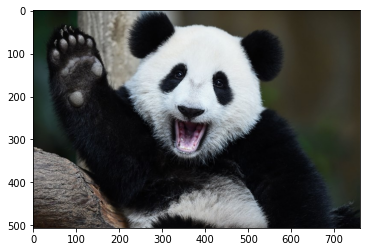

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# воспользуйтесь методом plt.imshow(), чтобы отобразить изображение
plt.imshow(image)

## Другие методы numpy

Сейчас мы изучим ещё некоторые методы для создания массивов numpy и выполнения математических операций, а именно `np.linspace` и `np.exp`. Как обычно, мы отсылаем вас к документации; документация API библиотеки numpy доступна здесь: https://docs.scipy.org/doc/numpy/reference/index.html (хотя, как правило, обычный поиск в гугле по имени функции направит вас в нужном направлении)

### Нанесение данных на график

Ранее мы импортировали `matplotlib.pyplot` как `plt`.

**Важно**:

* в среде Jupyter в зависимости от настроек по умолчанию, для того, чтобы графики и диаграммы отображались прямо в тетрадке, может оказаться нужным включить в какой-нибудь клетке команду `%matplotlib inline`.
* в чистом питоне (в отличие от среды Jupyter) необходимо вызывать команду `plt.show()` всякий раз, когда надо отобразить график или диаграмму.

### plt.plot(), np.linspace() и математические функции

Воспользуйтесь методом [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) чтобы создать массив из 100 точек со значениями от -1 до 3. Запишите его в переменную `x`. Теперь вычислите значения функции $y=\sin(\exp(-x^2))$ для каждого значения из `x` (используйте функции [np.sin](https://docs.scipy.org/doc/numpy-1.10.4/reference/generated/numpy.sin.html) и [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)) и нанесите точки на график используя [plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). 

Кроме того:
* используйте опцию `ls` метода `plt.plot`, чтобы изменить внешний вид линий на пунктир (dashed)
* используйте опцию `color` метода `plt.plot`, чтобы сделать линии красного цвета
* максимум функции достигается при $x=0$, покажите эту точку на графике при помощи черного кружка (воспользуйтесь опцией `marker`)

In [22]:
# создайте значения x и соответствующие им значение y
x = np.linspace(-1, 3, 100)
y = np.sin(np.exp(-x ** 2))

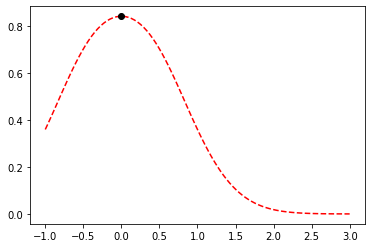

In [23]:
# нарисуйте график пунктирной линией и отметьте точку максимума чёрным кружком
plt.plot(x, y, ls='dashed', color='red')
plt.plot(0.0, np.sin(1.0), marker='o', color='black')

### Второй график

Сгенерируйте случайным образом 500 точек в 2D используя `np.random.randn` и постройте из них _точечную диаграмму_ (scatter plot) с учетом следующих требований:

* точки должны быть маленькими и синего цвета
* оси должны быть одинакового масштаба (см. параметр "equal" у `plt.axis`)
* отобразите среднее значение в виде большой красной точки
* установите в качестве названия графика (title) строку "Visualising random numbers" (для этого используйте `plt.title`), при этом размер шрифта должен быть 14 точек (см. опцию `fontsize`)
* подпишите оси: ось x как "x-axis" и ось y как "y-axis" (см. `plt.xlabel`, `plt.ylabel`)
* добавьте легенду (`plt.legend`), объясняющую значение тех или иных элементов графика, поместите её в левый нижний угол используя опцию `loc`


In [24]:
# сгенерируйте точки, вычислите среднее значение
points = np.random.randn(500, 2)
mean = points.mean(axis=0)

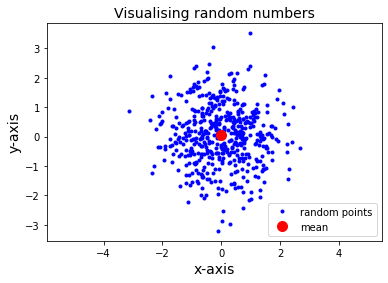

In [26]:
# отрисуйте точки на точечной диаграмме, сделайте оси одинакового размера
plt.plot(points[:, 0], points[:, 1], '.', color='blue', ls='none')
plt.axis('equal')
# отрисуйте среднее значение большой красной точкой
plt.plot(mean[0], mean[1], 'o', color='red', markersize=10)
# добавьте название (title), подпишите оси и добавьте легенду
plt.title('Visualising random numbers', fontsize=14)
plt.xlabel('x-axis', fontsize=14)
plt.ylabel('y-axis', fontsize=14)
plt.legend(['random points', 'mean'], loc='lower right')
